# APIs and web scraping

In this notebook, we will see a couple of examples on how to use web APIs and web scraping to get data from the web, through official means (APIs) and non-official ones (Web scraping).


## APIs

Many data services offer access to their data through APIa. APIs are a system to connect programs to one another while hiding their internal functioning. In this case, web APIs for data access allow to send requests for data in a standardized way from a script. This means that you can automate or make replicable the data downloads that you want.

In Python, we usually use the ```requests``` package for basic web access, and this includes sending requests and receiving data from APIs.

### An example: getting data from Google Ngrams

The Google Books Ngram Viewer is an online search engine that charts the frequencies of any set of search strings using a yearly count of n-grams found in printed sources published between 1500 and 2022 (Source: Wikipedia)

You can check for any set of n-grams by entering its webpage:

https://books.google.com/ngrams/

but, you can also send requests to an API and download the data in JSON format, and make a Pandas dataframe out of it.

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

When we use the requests package, we point to a url, and may send some other inputs to the request like headers and parameters.

For example, Google Ngram's API allows to send a JSON dictionary with the data we want to get:

(Source: https://stackoverflow.com/questions/74951626/python-nlp-google-ngram-api)

In [3]:
params = {
    "content": "trump, kennedy, roosevelt",
    "year_start": "1880",
    "year_end": "2022",
    "corpus" : "en-US",
    "smoothing" : "1",
    "case_insensitive" : "true"
}

So, we can use the requests package to send these params to the address of the Google Ngram API:

In [4]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.87 Safari/537.36",
}
ngram_url = "https://books.google.com/ngrams/json"

r = requests.get(ngram_url, params=params, headers=headers, timeout=30)
r

<Response [200]>

A response [200] means that the request was sent correctly.

In this case, the "text" field response from this API is a JSON dictionary with the data we requested:

In [5]:
r.text

'[{"ngram": "trump (All)", "parent": "", "type": "CASE_INSENSITIVE", "timeseries": [1.6436381979900716e-06, 1.5885126494197264e-06, 1.3075601662156564e-06, 1.2256546095083347e-06, 1.2346226464880299e-06, 1.1736191538602725e-06, 1.371676464856364e-06, 1.230494221478769e-06, 1.292535309005416e-06, 1.2884313823254463e-06, 1.3228510127305526e-06, 1.353653206119058e-06, 1.1517099238744779e-06, 1.421566575269632e-06, 1.5288698804738488e-06, 1.6397948906880326e-06, 1.558752515506967e-06, 1.6387929591132888e-06, 1.6942145843283167e-06, 1.4758272849727898e-06, 1.229514672000202e-06, 1.0980608161996013e-06, 1.0589080687850585e-06, 1.0927866126072179e-06, 1.1209046183087896e-06, 1.1982080418230603e-06, 1.1989724294873363e-06, 1.1076261401399279e-06, 1.1415489827489487e-06, 1.142321041906295e-06, 1.2618672199001442e-06, 1.0863570925797224e-06, 1.1184028541795972e-06, 9.815252646205863e-07, 9.721893169019797e-07, 8.478930576908775e-07, 8.850223688720386e-07, 9.314953407132028e-07, 9.310771886816838

So, we can make a Pandas dataframe out of it. Here we see that all of the case combinations were considered separately. So, we will make a Pandas dataframe and transform it into a dataframe keeping only the (All) option:

In [6]:
time_series = pd.read_json(r.text, typ="series")
time_series

<ipython-input-6-5cd177f24fdd>:1: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  time_series = pd.read_json(r.text, typ="series")


,0
0,"{'ngram': 'trump (All)', 'parent': '', 'type':..."
1,"{'ngram': 'Trump', 'timeseries': [4.2801745792..."
2,"{'ngram': 'trump', 'timeseries': [1.1485606137..."
3,"{'ngram': 'TRUMP', 'timeseries': [6.7060126340..."
4,"{'ngram': 'kennedy (All)', 'parent': '', 'type..."
5,"{'ngram': 'Kennedy', 'timeseries': [1.23098516..."
6,"{'ngram': 'KENNEDY', 'timeseries': [1.41860630..."
7,"{'ngram': 'kennedy', 'timeseries': [1.66528457..."
8,"{'ngram': 'KenneDY', 'timeseries': [8.24995516..."
9,"{'ngram': 'KennEDY', 'timeseries': [2.73724043..."


In [7]:
#get only items with "all":
all_bool = ["(" in time_series[item]['ngram'] for item in list(time_series.keys())]
time_series = time_series[all_bool]
dict_withname = {}

for key in time_series.keys():
    time_series[key]['ngram'] = time_series[key]['ngram'].replace(" (All)", "")
    temp = time_series[key]
    dict_withname[temp['ngram']] = temp['timeseries']

We can now make a dataframe:

In [8]:
data_frame = pd.DataFrame(dict_withname)
data_frame

,trump,kennedy,roosevelt
0,0.000002,0.000014,0.000002
1,0.000002,0.000013,0.000002
2,0.000001,0.000013,0.000003
3,0.000001,0.000013,0.000004
4,0.000001,0.000013,0.000004
...,...,...,...
138,0.000037,0.000021,0.000018
139,0.000050,0.000021,0.000017
140,0.000054,0.000021,0.000017
141,0.000053,0.000021,0.000015


And we add a column with the year:

In [9]:
data_frame['year'] = list(range(int(params['year_start']), int(params['year_end']) + 1))
data_frame

,trump,kennedy,roosevelt,year
0,0.000002,0.000014,0.000002,1880
1,0.000002,0.000013,0.000002,1881
2,0.000001,0.000013,0.000003,1882
3,0.000001,0.000013,0.000004,1883
4,0.000001,0.000013,0.000004,1884
...,...,...,...,...
138,0.000037,0.000021,0.000018,2018
139,0.000050,0.000021,0.000017,2019
140,0.000054,0.000021,0.000017,2020
141,0.000053,0.000021,0.000015,2021


And we can finally plot the values, by looping over the columns of this dataframe:

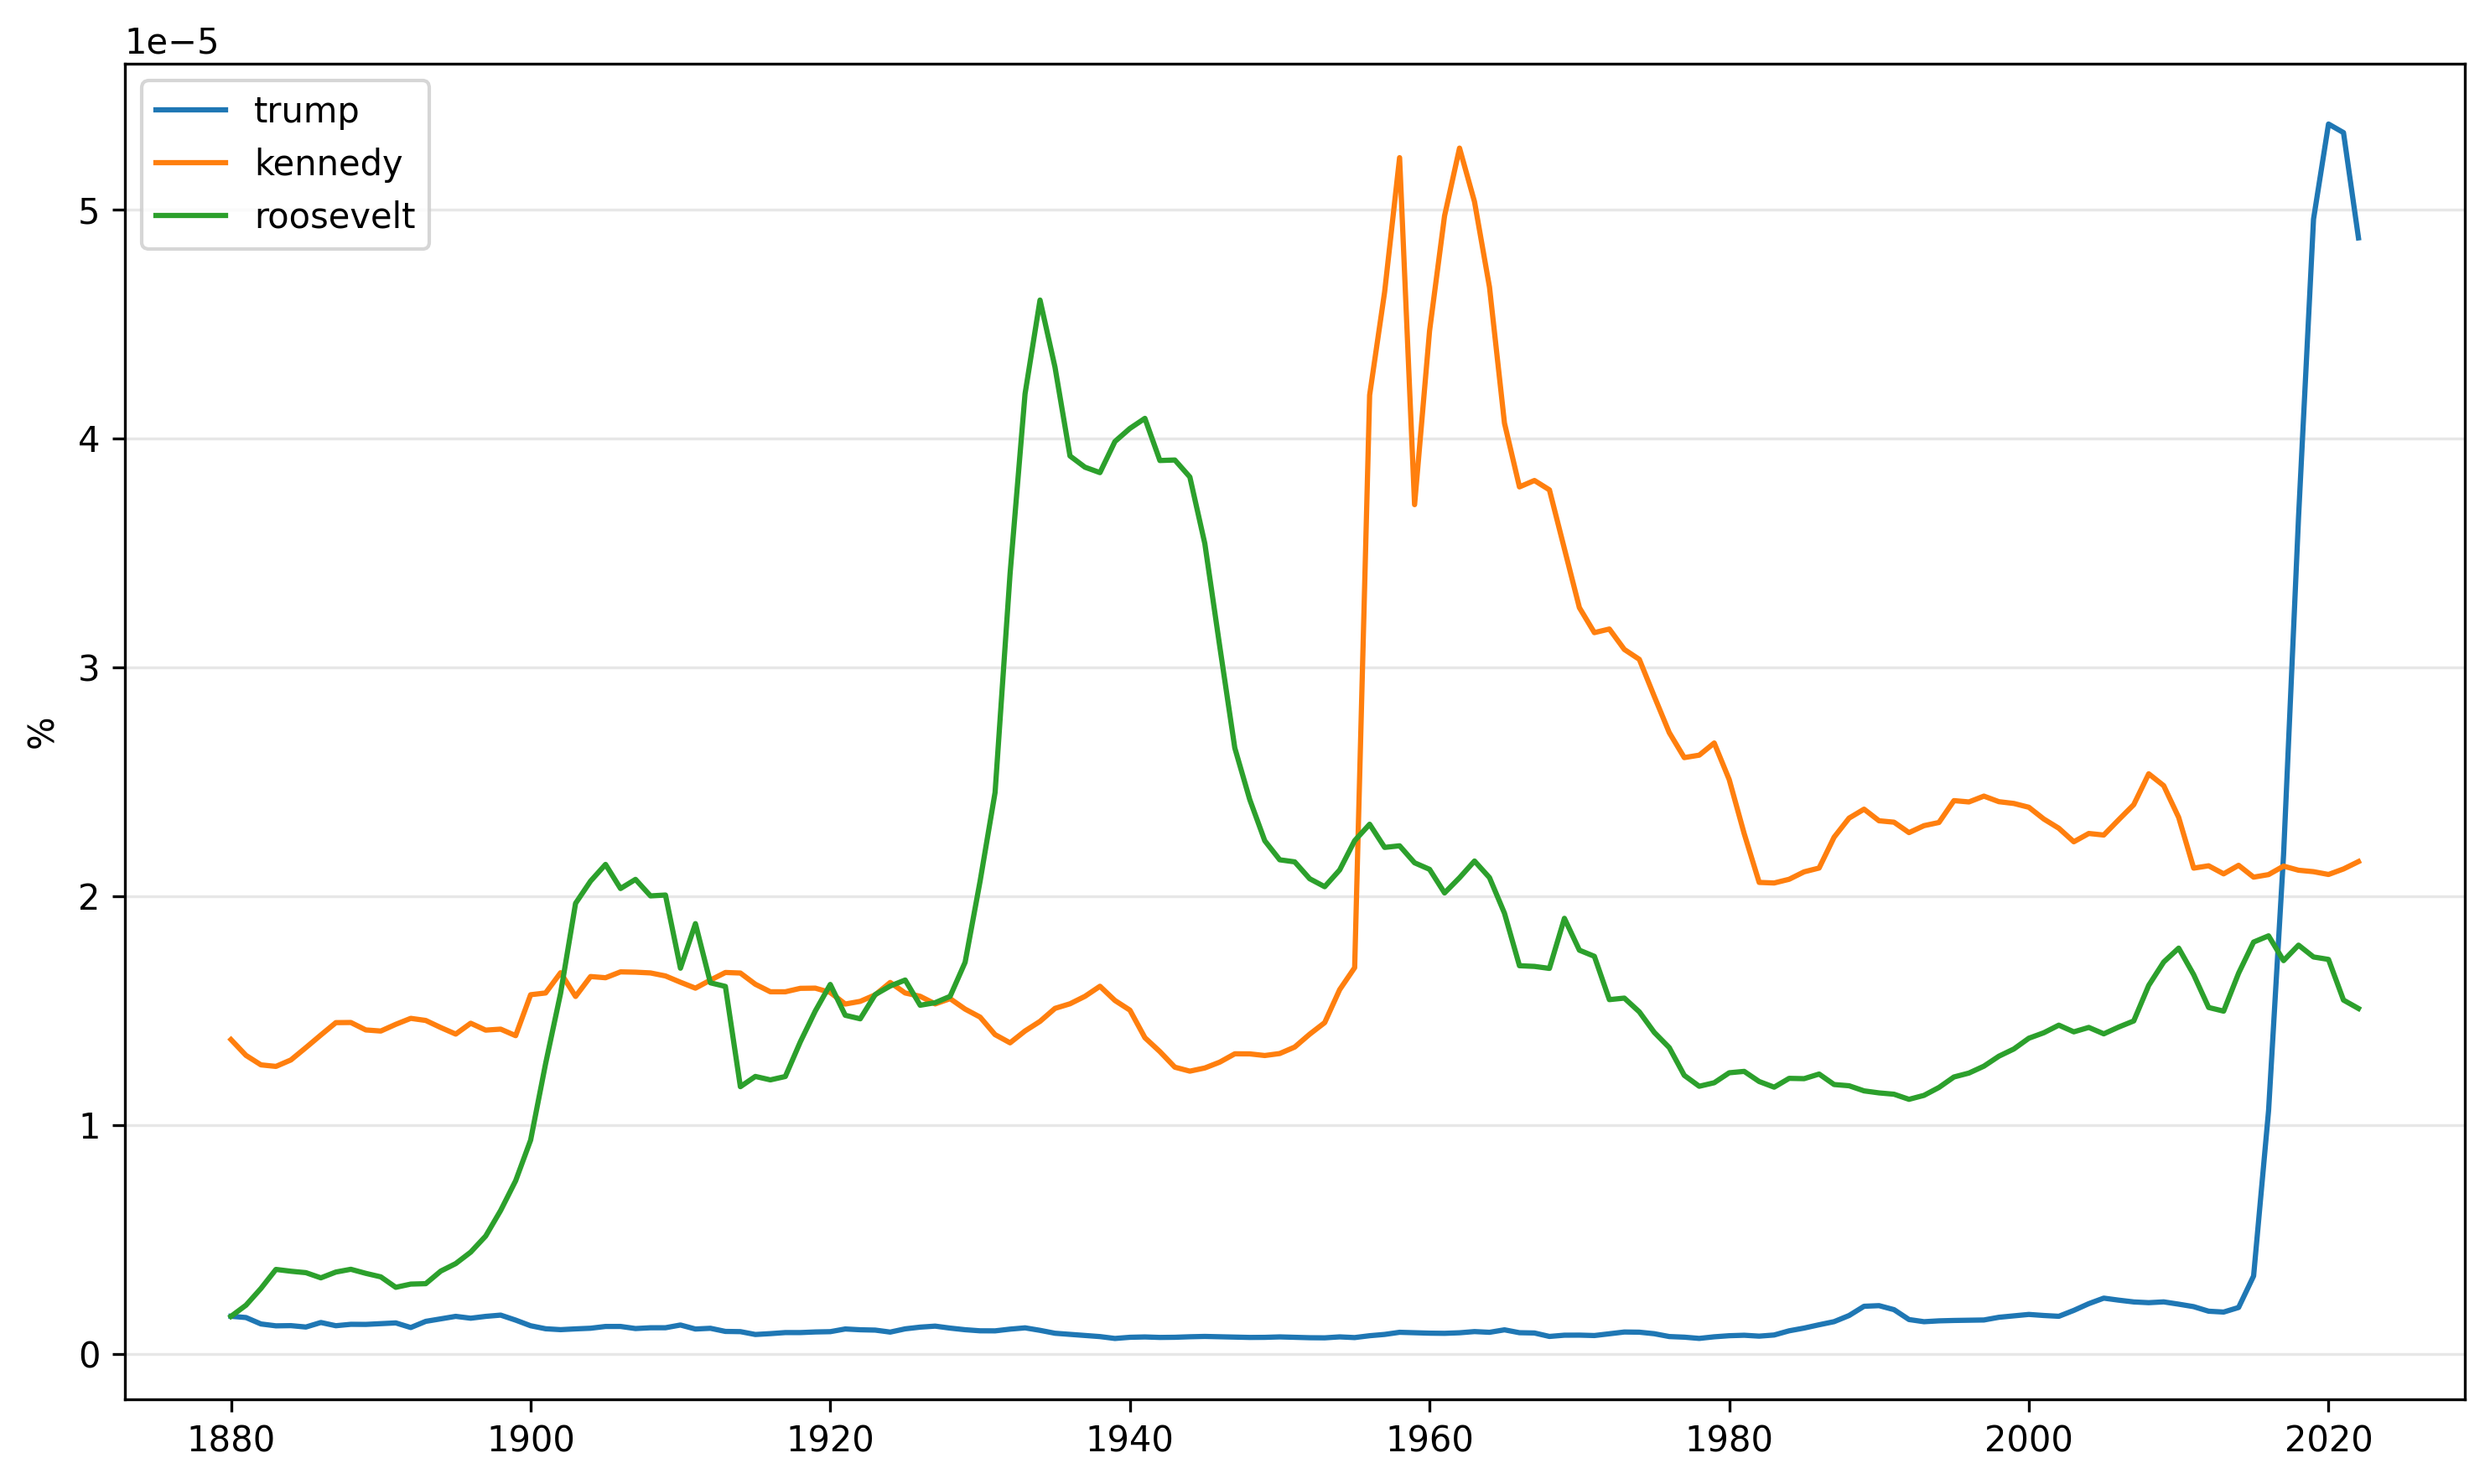

In [10]:
f, ax = plt.subplots(1, figsize = (10, 6), dpi = 300)

for series in data_frame:
    if series != 'year':
      ax.plot(data_frame['year'], data_frame[series], label=series)
# plt.title("Google Books Ngram Viewer", pad=10)
# matplotx.line_labels()  # https://stackoverflow.com/a/70200546/15164646
plt.legend()
plt.xticks(list(range(int(params['year_start']), int(params['year_end']) + 1, 20)))

plt.grid(axis="y", alpha=0.3)

plt.ylabel("%", labelpad=5)
plt.tight_layout()

In [11]:
!pip install cloudscraper

# Web Scraping

Web scraping refers to obtaining data from web resources, when this data is not explicitly available for download. We need some kind of bot to "crawl" the webpage, get its contents, and extract the data.

Needless to say, while this automates the extraction process for the data contained in a particular website, the process is going to be different for each different site!


## Building an example scraper using ```requests``` and ```BeautifulSoup```: Scraping from a webpage with fake job listings

(Source: https://realpython.com/beautiful-soup-web-scraper-python/)

When we use the ```requests``` package with a random website, we can easily obtain its contents. However, they usually don't look very readable, because we get the HTML code.  ```BeautifulSoup``` is a tool to "parse" this HTML code and extract useful information.

In our example, we will scrape fake job postings from https://realpython.github.io/fake-jobs/

In [12]:
import requests
from bs4 import BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

In [13]:
soup = BeautifulSoup(page.content)

Now we search inside the objects in the ResultsContainer, to discard all other elements of the webpage. Note that you have to inspect the webpage, because every webpage will have a different structure:

In [14]:
results = soup.find(id="ResultsContainer")
results.prettify()

'<div class="columns is-multiline" id="ResultsContainer">\n <div class="column is-half">\n  <div class="card">\n   <div class="card-content">\n    <div class="media">\n     <div class="media-left">\n      <figure class="image is-48x48">\n       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>\n      </figure>\n     </div>\n     <div class="media-content">\n      <h2 class="title is-5">\n       Senior Python Developer\n      </h2>\n      <h3 class="subtitle is-6 company">\n       Payne, Roberts and Davis\n      </h3>\n     </div>\n    </div>\n    <div class="content">\n     <p class="location">\n      Stewartbury, AA\n     </p>\n     <p class="is-small has-text-grey">\n      <time datetime="2021-04-08">\n       2021-04-08\n      </time>\n     </p>\n    </div>\n    <footer class="card-footer">\n     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">\n      Learn\n     </a>\n    

Now you can work with your new object called results and select only the job postings in it. These are, after all, the parts of the HTML that you’re interested in! You can pick out all job cards in a single line of code.

Now, each element in these job cards still contains a lot of HTML, but is somewhat readable:

In [15]:
job_cards = results.find_all("div", class_="card-content")
job_cards[0]

<div class="card-content">
<div class="media">
<div class="media-left">
<figure class="image is-48x48">
<img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
</figure>
</div>
<div class="media-content">
<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
</div>
</div>
<div class="content">
<p class="location">
        Stewartbury, AA
      </p>
<p class="is-small has-text-grey">
<time datetime="2021-04-08">2021-04-08</time>
</p>
</div>
<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html" target="_blank">Apply</a>
</footer>
</div>



---



We can go deeper in finding key elements inside each of these job cards:

In [16]:
for job_card in job_cards[0:3]:
    title_element = job_card.find("h2", class_="title")
    company_element = job_card.find("h3", class_="company")
    location_element = job_card.find("p", class_="location")
    datetime = job_card.find('time')
    print(title_element)
    print(company_element)
    print(location_element)
    print(datetime)
    print()

<h2 class="title is-5">Senior Python Developer</h2>
<h3 class="subtitle is-6 company">Payne, Roberts and Davis</h3>
<p class="location">
        Stewartbury, AA
      </p>
<time datetime="2021-04-08">2021-04-08</time>

<h2 class="title is-5">Energy engineer</h2>
<h3 class="subtitle is-6 company">Vasquez-Davidson</h3>
<p class="location">
        Christopherville, AA
      </p>
<time datetime="2021-04-08">2021-04-08</time>

<h2 class="title is-5">Legal executive</h2>
<h3 class="subtitle is-6 company">Jackson, Chambers and Levy</h3>
<p class="location">
        Port Ericaburgh, AA
      </p>
<time datetime="2021-04-08">2021-04-08</time>



We might want to find elements containing a particular piece of text, for instance jobs for Python development.

In [17]:
python_jobs = results.find_all(
 "h2", string=lambda text: "python" in text.lower()
)


But, we quickly realize that this only contains the job title:

In [18]:
python_jobs[0]

<h2 class="title is-5">Senior Python Developer</h2>

So, we use the "parent" method to get the whole job card, so that it looks like our previous collection of job cards

In [19]:
python_job_cards = [
h2_element.parent.parent.parent for h2_element in python_jobs
]
for job_card in python_job_cards[0:3]:
  title_element = job_card.find("h2", class_="title")
  company_element = job_card.find("h3", class_="company")
  location_element = job_card.find("p", class_="location")
  datetime = job_card.find('time')
  print(title_element.text.strip())
  print(company_element.text.strip())
  print(location_element.text.strip())
  print(datetime.text.strip())
  print()


Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA
2021-04-08

Software Engineer (Python)
Garcia PLC
Ericberg, AE
2021-04-08

Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE
2021-04-08



If we hit the Apply button, we are referred to another page with a longer job description. Here, we get the text from the job description that comes from this other webpage:

In [20]:
footer = job_card.find("footer", class_ = "card-footer")
footer

<footer class="card-footer">
<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>
<a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html" target="_blank">Apply</a>
</footer>

In [21]:
footer_elements = footer.find_all('a')
footer_elements

[<a class="card-footer-item" href="https://www.realpython.com" target="_blank">Learn</a>,
 <a class="card-footer-item" href="https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html" target="_blank">Apply</a>]

The URL:

In [22]:
footer_elements[1]['href']

'https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html'

In [23]:
job_description_webpage = requests.get(footer_elements[1]['href'])
job_description_webpage.content

b'<!DOCTYPE html>\n<html>\n  <head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n    <title>Fake Python</title>\n    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">\n  </head>\n  <body>\n  <section class="section">\n    <div class="container mb-5">\n      <h1 class="title is-1">\n        Fake Python\n      </h1>\n      <p class="subtitle is-3">\n        Fake Jobs for Your Web Scraping Journey\n      </p>\n    </div>\n    <div class="container">\n    <div id="ResultsContainer" class="columns is-multiline">\n    <div class="box">\n<h1 class="title is-2">Python Programmer (Entry-Level)</h1>\n<h2 class="subtitle is-4 company">Moss, Duncan and Allen</h2>\n<div class="content">\n    <p>Java programs distributed teamwork Java developer talented developer. Teamwork growth opportunity programs remote. Communities agile Flask company CSS teamwork. Software Developer SCRUM oversea CSS Flask role jo

We can make a new beautifoulsoup out of this:

In [24]:
daughter_soup = BeautifulSoup(job_description_webpage.content)

And extract the text:

In [25]:
daughter_soup.find('div', class_ = 'content').find('p').text

'Java programs distributed teamwork Java developer talented developer. Teamwork growth opportunity programs remote. Communities agile Flask company CSS teamwork. Software Developer SCRUM oversea CSS Flask role job. Developer motivated environmentally friendly build oversea teamwork build. Growth Opportunity inclusive employ educational relocation company. Motivated growth opportunity growth opportunity dashboard.'

EXAMPLE: Extracting all of this data to a Pandas dataframe

In [26]:
python_job_cards = [
h2_element.parent.parent.parent for h2_element in python_jobs
]
datadict = {}
for job_card in python_job_cards:
    daughters_soup_url = job_card.find("footer", class_ = "card-footer").find_all('a')[1]['href']
    daughters_soup_html = requests.get(daughters_soup_url)
    daughters_soup = BeautifulSoup(daughters_soup_html.content)
    job_description = daughters_soup.find('div', class_ = 'content').find('p').text.strip()

    title_element = job_card.find("h2", class_="title").text.strip()
    company_element = job_card.find("h3", class_="company").text.strip()
    location_element = job_card.find("p", class_="location").text.strip()
    datetime = job_card.find('time')

    datadict[title_element] = {
        'company' : company_element,
        'location' : location_element,
        'date_posted' : datetime,
        'job_description' : job_description}



In [27]:
pd.DataFrame(datadict).T

,company,location,date_posted,job_description
Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",[2021-04-08],Professional asset web application environment...
Software Engineer (Python),Garcia PLC,"Ericberg, AE",[2021-04-08],Collaborate discussions responsible tech growt...
Python Programmer (Entry-Level),Mathews Inc,"Robertborough, AP",[2021-04-08],Asset teamwork open-minded professional. Explo...
Software Developer (Python),Moreno-Rodriguez,"Martinezburgh, AE",[2021-04-08],Support communities job web application Python...
Python Developer,Rivera and Sons,"East Michaelfort, AA",[2021-04-08],Css role company. Oversea include distributed ...
"Back-End Web Developer (Python, Django)","Jackson, Ali and Mckee","New Elizabethside, AA",[2021-04-08],Detail-Oriented support Django. Build support ...


## Another kind of API: SQL-like APIs

Structured Query Language (SQL) (pronounced /ˌɛsˌkjuˈɛl/ S-Q-L; or alternatively as /ˈsiːkwəl/ "sequel") is a domain-specific language used to manage data, especially in a relational database management system (RDBMS). It is particularly useful in handling structured data, i.e., data incorporating relations among entities and variables. (Source: Wikipedia)

You will see that some very large datasets stored in services like Amazon S3 or Microsoft Azure is queried using SQL.

### An example: Downloading building geometry data from Overture Foundation

Overture Foundation is a non-profit foundation (Run by a conglomerate of very much for-profit, huge corporations) that provides geospatial data on buildings, roads, etc.

Anyone can get their data through an API and use it in their applications, the instructions are here:

https://docs.overturemaps.org/getting-data/

In [28]:
import duckdb

In [29]:
!pwd

/content


An example function, querying the buildings inside a bounding box that we define:

In [30]:
def download_buildings_to_parquet(bbox):
    output_file = f"{bbox['quadkey']}.parquet"
    s3_path = "s3://overturemaps-us-west-2/release/2025-01-22.0/theme=buildings/type=building/*"

    sql_query = f'''
    COPY (
      SELECT
        id,
        names.primary as primary_name,
        height,
        geometry
      FROM read_parquet('{s3_path}', filename=true, hive_partitioning=1)
      WHERE bbox.xmin BETWEEN {bbox['xmin']} AND {bbox['xmax']}
      AND bbox.ymin BETWEEN {bbox['ymin']} AND {bbox['ymax']}
      LIMIT 1000
    ) TO '{output_file}' (FORMAT 'parquet');
    '''

    # Execute the query using the duckdb Python module
    conn = duckdb.connect()
    conn.execute("INSTALL spatial;")
    conn.execute("INSTALL azure;")
    conn.execute("LOAD spatial;")
    conn.execute(sql_query)
    conn.close()

In [31]:
manhattan_bbox = {
    "xmin": -74.0479,  # Western boundary
    "xmax": -73.9067,  # Eastern boundary
    "ymin": 40.6829,   # Southern boundary
    "ymax": 40.8820,   # Northern boundary
    "quadkey": "manhattan"
}


In [32]:
download_buildings_to_parquet(manhattan_bbox)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [35]:
import geopandas as gp
manhattan = gp.read_parquet('manhattan.parquet')

In [39]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 50.0 MB/s eta 0:00:00


In [40]:
from matplotlib import pyplot as plt
import contextily as cx

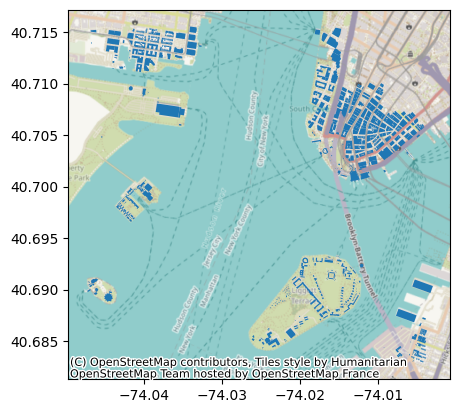

In [44]:
ax = manhattan.plot()
cx.add_basemap(ax, crs = manhattan.crs)


### Another API example: NHGIS API

The National Historical Geographic Information System (NHGIS) is a historical GIS project to create and freely disseminate a database incorporating all available aggregate census information for the United States (Source: Wikipedia)


In [45]:
from google.colab import drive
drive.mount('/content/drive')

import os
basepath = '/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science'
%cd {basepath}
with open("tokens/ipums_key.txt") as tx:
    my_key = tx.readlines()[0]
drive.flush_and_unmount()
os.chdir('/content')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/CEMFI/2024_25_PhD/Data_Science


If we access the ipums API with my key, it prints all of my previous extracts:

In [62]:
my_headers = {"Authorization": my_key}
url = "https://api.ipums.org/extracts/?product=nhgis&version=v1"
r = requests.get(url,
    headers=my_headers
    )
extract = r.json()
extract

[{'data_format': 'csv_no_header',
  'description': 'get_population_counties_1980_education',
  'datasets': {'1980_STF3': {'data_tables': ['NT48A'],
    'geog_levels': ['county'],
    'breakdown_values': ['bs03.ge0000']}},
  'number': 187,
  'status': 'completed',
  'download_links': {'codebook_preview': 'https://api.ipums.org/downloads/nhgis/api/v1/extracts/2445095/nhgis0187_csv_PREVIEW.zip',
   'table_data': 'https://api.ipums.org/downloads/nhgis/api/v1/extracts/2445095/nhgis0187_csv.zip'}},
 {'data_format': 'csv_no_header',
  'description': 'get population county level 1980',
  'datasets': {'1980_STF1': {'data_tables': ['NT1A'],
    'geog_levels': ['county'],
    'breakdown_values': ['bs03.ge0000']}},
  'number': 186,
  'status': 'completed',
  'download_links': {'codebook_preview': 'https://api.ipums.org/downloads/nhgis/api/v1/extracts/2445094/nhgis0186_csv_PREVIEW.zip',
   'table_data': 'https://api.ipums.org/downloads/nhgis/api/v1/extracts/2445094/nhgis0186_csv.zip'}},
 {'data_for

bunch of definitions:

In [64]:
from tqdm import tqdm
import sys
import fileinput
import zipfile
import shutil
import requests
import json
import time

In [65]:
def dirname(local_filename):
    splitname = local_filename.split("/")
    leng = len(splitname)-1
    splitname = splitname[0:leng]
    sep = "/"
    dirname = sep.join(splitname)
    return dirname

def download_file(urlb, header, local_filename):
    print("Downloading the files, this takes a while")
    print("")
    with requests.get(urlb, allow_redirects=True, headers=header, stream=True) as r:
        with open(local_filename, "wb") as f:
            total_length = r.headers.get("content_length")
            dl = 0
            if total_length is None :  #No content length header
                f.write(r.content)
            else:
                for chunk in tqdm(r.iter_content(1024)):
                    dl += len(chunk)
                    f.write(chunk)
                    done = int( dl / total_length)

##Function to replace a specific part of a line for another
def replaceExp(file, replacedir):
    for searchExp, replaceExp in replacedir.items():
        with fileinput.input(file, inplace=1) as input:
            for line in input:
                if searchExp in line:
                    line = line.replace(searchExp,replaceExp)
                sys.stdout.write(line)

def download_and_decompress(type):
    my_headers = {"Authorization": my_key}
    url = "https://api.ipums.org/extracts/?product=nhgis&version=v1"
    er = requestdict[type]
    # result = requests.post(url, headers=my_headers, json=json.loads(er))
    result = requests.post(url, headers = my_headers, json = er)
    my_extract_number = result.json()["number"]
    # my_extract_number = 36 #For testing purposes
    print("my extract number is " + str(my_extract_number))
    ##Post the JSON request and extract the extract number

    t = 0
    success = 0
    print("Sending request to NHGIS, waiting for completion")
    while t < 18000 and success == 0:
        r = requests.get(
        "https://api.ipums.org/extracts?product=nhgis&version=v1",
        headers=my_headers
        )
        for extract in r.json():
            if extract["number"] == my_extract_number and extract["status"] == "completed":
                my_extract_links = extract["download_links"]; success = 1; print("DONE!"); break
            else: time.sleep(0.2); t =+1; pass
    ##Fetch the status of the JSON request to NHGIS every 0.2 seconds
    ## When completed, break the loop to download the stuff (Wait up to 10 hours)

    urlb = my_extract_links["table_data"]; local_filename = zipdict[type]

    try: os.makedirs(dirdict[type])
    except: pass

    download_file(urlb, my_headers, local_filename)
    ## Once status is complete, download the files to disk

    with zipfile.ZipFile(local_filename, "r") as zip_ref:
        targetdir = local_filename.split(".")[0]
        if not os.path.exists(targetdir):
            os.makedirs(targetdir)
        zip_ref.extractall(targetdir)
    ##First extraction out of the zip file

    os.remove(local_filename)
    ##Remove zip file
    for currentpath, folders, files in os.walk(targetdir):
        counter = 0
        for file in files:
            if file.endswith(".zip"):
                with zipfile.ZipFile(os.path.join(currentpath, file), "r") as zip_ref:
                    zip_ref.extractall(dirdict[type])
                counter = 1
            elif file.endswith((".csv", ".txt", ".dat", ".do")):
                #Make final file with consistent name.
                #First, file names:
                fromfile = os.path.join(currentpath, file)
                tofile = os.path.join(dirdict[type], file.replace(f'nhgis{str(my_extract_number).zfill(4)}_', ''))
                #copy to final file removing references to nhgis request
                shutil.move(fromfile, tofile)
                #Remove references to the specific nhgis request from code
                if file.endswith('.do'):
                    replaceExp(
                        tofile,
                        {f'nhgis{str(my_extract_number).zfill(4)}_':''}
                        )
                counter = 1
            for folder in folders:
                if os.path.isdir(os.path.join(currentpath,folder)) and counter == 1:
                    os.removedirs(os.path.join(currentpath,folder))
                else: pass
    shutil.rmtree(targetdir)
    print("All files for " + type + " downloaded and extracted")
    ##Extract shapefiles to folder, remove everything that is zipped and targetdir


In [66]:
states_strlist = ["010","020","040","050","060","080", "090", "100", "110", "120", "130", "160", "170", "180", "190", "200", "210", "220", "230", "240", "250", "260", "270", "280", "290", "300", "310", "320", "330", "340", "350", "360", "370", "380", "390", "400", "410", "420", "440", "450", "460", "470", "480", "490", "500", "510", "530", "540", "550", "560"]

In [70]:
requestdict = {
  "duranton_puga_hedonic_17_21" : {
    "data_format": "fixed_width",
    "description": "duranton_puga_hedonic_2017_21",
    "datasets": {
      "2017_2021_ACS5a": {
        "data_tables": ["B01003",
                        "B03002",
                        "B11012",
                        "B25001",
                        "B25024",
                        "B25034",
                        "B25035",
                        "B25041",
                        "B25058",
                        "B25077"],
        "geog_levels": ["blck_grp"],
        "breakdown_values": ["bs32.ge00"]
        }
    },
    "geographic_extents": states_strlist,
    "breakdown_and_data_type_layout": "csv_no_header"
  },
} #(This closes requestdict)


In [68]:
zipdict =  {
    "duranton_puga_hedonic_17_21" : "data/acs/hedonic_prices/hedonic_prices.zip",
}
dirdict = {
    "duranton_puga_hedonic_17_21" : "data/acs/hedonic_prices/",
}

In [69]:
for type in (
    "duranton_puga_hedonic_17_21",
    ):
    print(type)

    download_and_decompress(type)

duranton_puga_hedonic_17_21
my extract number is 188
Sending request to NHGIS, waiting for completion
DONE!

All files for duranton_puga_hedonic_17_21 downloaded and extracted
